In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from pandas.plotting import scatter_matrix
from keras.losses import mse
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping
from keras.layers import Activation
from numpy.linalg import norm
import random
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler, MinMaxScaler

%matplotlib inline

Using TensorFlow backend.


In [3]:
df_atmes = pd.read_csv("americanToadMes.csv")
df_atmes.drop('Unnamed: 0',axis=1,inplace=True)
#df_gfmes = pd.read_csv("greenFrogPadraoMes.csv")
#df_spmes = pd.read_csv("springPeeperPadraoMes.csv")
#df_atest = pd.read_csv("americanToadPadraoEstacao.csv")
#df_gfest = pd.read_csv("greenFrogPadraoEstacao.csv")
#df_spest = pd.read_csv("springPeeperPadraoEstacao.csv")

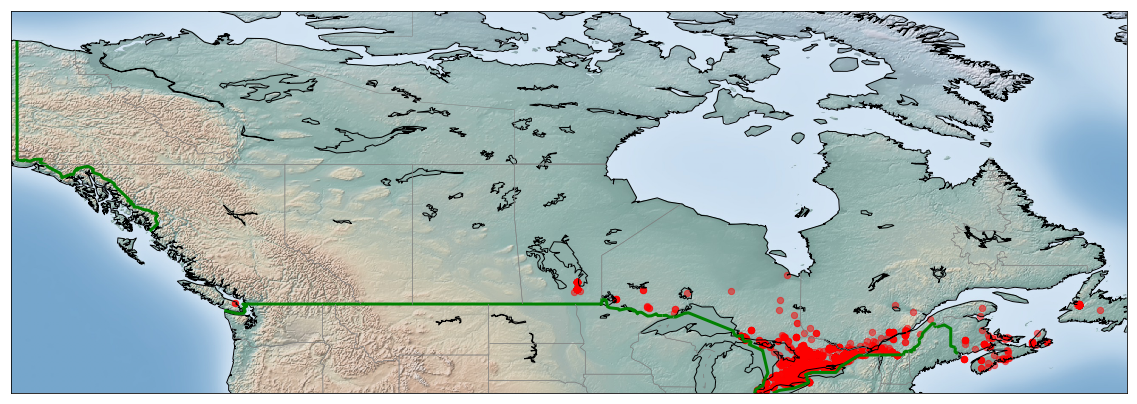

In [152]:
lat = df_atmes['lat']*180/np.pi
lng = df_atmes['lng']*180/np.pi
lon_min=-141.5
lon_max=-54
lat_min=42
lat_max=72
fig = plt.figure(figsize=(20, 30))
bm = Basemap(projection='cyl', resolution='l',
            llcrnrlat=lat_min, urcrnrlat=lat_max,
            llcrnrlon=lon_min, urcrnrlon=lon_max)
bm.shadedrelief()
bm.drawcoastlines(color='black')
bm.drawcountries(color='green',linewidth=3)
bm.drawstates(color='gray')
bm.scatter(lng, lat, latlon=True, s=40, c='red', alpha=0.5)
plt.show()

## Padronizando com o RobustScaler + MinMaxScaler

In [4]:
# O robust é bom por não ser enganado pelos outliers na média e variância
origin = df_atmes.copy()
rbs = RobustScaler()
mms = MinMaxScaler()
cols = df_atmes.columns
df_atmes = rbs.fit_transform(df_atmes)
df_atmes = mms.fit_transform(df_atmes)
df_atmes = pd.DataFrame(df_atmes, columns=cols)

In [91]:
df_atmes.head(10)

date       lat       lng  thunder  snow  minhumidity  \
0  0.454545  0.759298  0.000000      0.0   0.0     0.479167   
1  0.454545  0.759298  0.000000      0.0   0.0     0.437500   
2  0.363636  0.478079  0.849911      0.0   0.0     0.333333   
3  0.818182  0.456111  0.848086      0.0   0.0     0.489583   
4  0.363636  0.468840  0.853009      0.0   0.0     0.291667   
5  0.545455  0.477393  0.839897      0.0   0.0     0.500000   
6  0.363636  0.466153  0.845852      0.0   0.0     0.760417   
7  0.272727  0.882953  0.376101      0.0   0.0     0.052083   
8  0.272727  0.882953  0.376101      0.0   0.0     0.031250   
9  0.272727  0.882953  0.376101      0.0   0.0     0.052083   

   coolingdegreedays  maxdewptm  heatingdegreedays  meanpressurem    ...     \
0                0.0   0.588235           0.052632       0.498859    ...      
1                0.0   0.627451           0.157895       0.542833    ...      
2                0.0   0.509804           0.276316       0.586600    ...      
3                0.0   0.529412           0.263158       0.156607    ...      
4                0.0   0.470588           0.315789       0.632856    ...      
5                0.4   0.803922           0.000000       0.452603    ...      
6                0.0   0.470588           0.302632       0.557561    ...      
7                0.0   0.313725           0.289474       0.364032    ...      
8                0.0   0.254902           0.236842       0.519602    ...      
9                0.0   0.372549           0.039474       0.379589    ...      

   meanwindspdm  maxpressurem  hail  meandewptm  maxwspdm   precipm  \
0      0.009524      0.469388   0.0    0.692308     0.010  0.000000   
1      0.047619      0.612245   0.0    0.711538     0.075  0.000000   
2      0.047619      0.591837   0.0    0.557692     0.075  0.001409   
3      0.209524      0.163265   0.0    0.576923     0.185  0.014085   
4      0.095238      0.632653   0.0    0.500000     0.085  0.028171   
5      0.228571      0.448980   0.0    0.884615     0.185  0.000000   
6      0.295238      0.551020   0.0    0.576923     0.215  0.000000   
7      0.180952      0.387755   0.0    0.384615     0.240  0.000000   
8      0.114286      0.530612   0.0    0.346154     0.140  0.000000   
9      0.266667      0.367347   0.0    0.461538     0.280  0.000000   

   meantempm  meanwdird  maxhumidity  mintempm  
0   0.740741   0.000000     0.671053  0.775862  
1   0.666667   0.108033     0.973684  0.672414  
2   0.574074   0.166205     1.000000  0.534483  
3   0.574074   0.889197     0.934211  0.655172  
4   0.518519   0.531856     0.776316  0.568966  
5   0.851852   0.606648     0.894737  0.896552  
6   0.537037   0.110803     0.934211  0.637931  
7   0.555556   0.000000     0.565789  0.568966  
8   0.592593   0.000000     0.197368  0.568966  
9   0.740741   0.000000     0.065789  0.758621  

[10 rows x 28 columns]

In [92]:
origin.head(10)

date       lat       lng  thunder  snow  minhumidity  coolingdegreedays  \
0     6  0.855986 -2.162174      0.0   0.0         50.0                0.0   
1     6  0.855986 -2.162174      0.0   0.0         46.0                0.0   
2     5  0.810612 -1.106800      0.0   0.0         36.0                0.0   
3    10  0.807068 -1.109066      0.0   0.0         51.0                0.0   
4     5  0.809122 -1.102953      0.0   0.0         32.0                0.0   
5     7  0.810502 -1.119235      0.0   0.0         52.0                8.0   
6     5  0.808688 -1.111839      0.0   0.0         77.0                0.0   
7     4  0.875937 -1.695151      0.0   0.0          9.0                0.0   
8     4  0.875937 -1.695151      0.0   0.0          7.0                0.0   
9     4  0.875937 -1.695151      0.0   0.0          9.0                0.0   

   maxdewptm  heatingdegreedays  meanpressurem    ...     meanwindspdm  \
0       10.0                4.0        1016.50    ...              1.0   
1       12.0               12.0        1018.62    ...              5.0   
2        6.0               21.0        1020.73    ...              5.0   
3        7.0               20.0        1000.00    ...             22.0   
4        4.0               24.0        1022.96    ...             10.0   
5       21.0                0.0        1014.27    ...             24.0   
6        4.0               23.0        1019.33    ...             31.0   
7       -4.0               22.0        1010.00    ...             19.0   
8       -7.0               18.0        1017.50    ...             12.0   
9       -1.0                3.0        1010.75    ...             28.0   

   maxpressurem  hail  meandewptm  maxwspdm  precipm  meantempm  meanwdird  \
0        1017.0   0.0         9.0       2.0      0.0       16.0       -1.0   
1        1024.0   0.0        10.0      15.0      0.0       12.0       38.0   
2        1023.0   0.0         2.0      15.0      0.2        7.0       59.0   
3        1002.0   0.0         3.0      37.0      2.0        7.0      320.0   
4        1025.0   0.0        -1.0      17.0      4.0        4.0      191.0   
5        1016.0   0.0        19.0      37.0      0.0       22.0      218.0   
6        1021.0   0.0         3.0      43.0      0.0        5.0       39.0   
7        1013.0   0.0        -7.0      48.0      0.0        6.0       -1.0   
8        1020.0   0.0        -9.0      28.0      0.0        8.0       -1.0   
9        1012.0   0.0        -3.0      56.0      0.0       16.0       -1.0   

   maxhumidity  mintempm  
0         75.0      12.0  
1         98.0       6.0  
2        100.0      -2.0  
3         95.0       5.0  
4         83.0       0.0  
5         92.0      19.0  
6         95.0       4.0  
7         67.0       0.0  
8         39.0       0.0  
9         29.0      11.0  

[10 rows x 28 columns]

# Feature Selection

In [5]:
def classifica_dict(d, reverso):
    feature = []
    valor = []
    for b in sorted(d, key = d.get,reverse=reverso):
        feature.append(b)
        valor.append(d[b])
    return feature, valor

In [6]:
def interquartile_ranking(data):
    ir = {}
    zeros = []
    for c in data.columns:
        inter = data[c].quantile(q=0.75) - data[c].quantile(q=0.25)
        if (inter == 0):
            zeros.append(c)
        else:
            ir[c] = inter 
    return classifica_dict(ir,reverso=False), zeros

In [7]:
ir, zeros = interquartile_ranking(df_atmes)
ir

(['lng',
  'maxwspdm',
  'meanwindspdm',
  'date',
  'maxtempm',
  'meantempm',
  'minwspdm',
  'mintempm',
  'lat',
  'maxdewptm',
  'heatingdegreedays',
  'maxpressurem',
  'mindewptm',
  'meanpressurem',
  'maxhumidity',
  'minpressurem',
  'meandewptm',
  'humidity',
  'minhumidity',
  'gdegreedays',
  'meanwdird'],
 [0.031597279692543,
  0.05499999999999999,
  0.057142857142857134,
  0.09090909090909094,
  0.11764705882352944,
  0.12962962962962965,
  0.1313131313131313,
  0.13793103448275867,
  0.1513527625653154,
  0.1568627450980392,
  0.15789473684210528,
  0.16326530612244894,
  0.16666666666666674,
  0.17071147064924203,
  0.1842105263157895,
  0.19148936170212771,
  0.1923076923076923,
  0.25,
  0.27083333333333326,
  0.4,
  0.6481994459833795])

In [8]:
zeros

['thunder', 'snow', 'coolingdegreedays', 'rain', 'fog', 'hail', 'precipm']

In [9]:
# Elimina as features com intervalo entre quartis zerado
for c in zeros:
    df_atmes.drop(c,axis=1,inplace=True)

# Arquiteturas de Redes Autoencoders

In [10]:
# Separa as base de treino e teste
X_trainAtMes, X_testAtMes = train_test_split(df_atmes, test_size=0.30, random_state=42)

In [11]:
batch = len(df_atmes)//10
batch

367

In [12]:
attest_dim = len(X_testAtMes)//10
attest_dim

110

In [13]:
input_dim = len(df_atmes.columns)
input_dim

21

## Arquitetura 1: Sem redução, apenas Dropout

In [21]:
# Outra tentativa
encoding_dim1 = input_dim//2
entrada = Input(shape=(input_dim,))
x = Dropout(0.3)(entrada)
x = Dense(input_dim,activation="tanh")(x)
decoded = Dense(input_dim,activation="sigmoid")(x)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [22]:
# Cria o modelo para a rede anteriormente montada
ae1 = Model(entrada,decoded)

In [23]:
# Compila o modelo com o método otimizador e a funlção de erro utilizadas
ae1.compile(optimizer='adam', loss='mse')

In [24]:
# Treina a rede
# EarlyStopping para o treinamento se ver que não tá mais melhorando
# History é para plotar gráficos de erro
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100, restore_best_weights=True)
history_ae1 = ae1.fit(X_trainAtMes, X_trainAtMes,
                epochs=10000,
                batch_size=batch,
                shuffle=True,
                validation_split=0.3,
                callbacks=[es])

Instructions for updating:
Use tf.cast instead.
Train on 1800 samples, validate on 772 samples
Epoch 1/10000
1800/1800 [==============================] - 3s 2ms/step - loss: 0.1038 - val_loss: 0.0983
Epoch 2/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0971 - val_loss: 0.0901
Epoch 3/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0897 - val_loss: 0.0826
Epoch 4/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0829 - val_loss: 0.0757
Epoch 5/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0770 - val_loss: 0.0695
Epoch 6/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0708 - val_loss: 0.0637
Epoch 7/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0658 - val_loss: 0.0584
Epoch 8/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0607 - val_loss: 0.0534
Epoch 9/10000
1800/1800 [==============================] -

1800/1800 [==============================] - 0s 13us/step - loss: 0.0172 - val_loss: 0.0146
Epoch 75/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0174 - val_loss: 0.0144
Epoch 76/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0173 - val_loss: 0.0143
Epoch 77/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0170 - val_loss: 0.0142
Epoch 78/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0170 - val_loss: 0.0141
Epoch 79/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0170 - val_loss: 0.0140
Epoch 80/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0168 - val_loss: 0.0139
Epoch 81/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0167 - val_loss: 0.0138
Epoch 82/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0165 - val_loss: 0.0137
Epoch 83/10000
1800/1800 [==========================

1800/1800 [==============================] - 0s 16us/step - loss: 0.0134 - val_loss: 0.0090
Epoch 151/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0132 - val_loss: 0.0090
Epoch 152/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0133 - val_loss: 0.0090
Epoch 153/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0135 - val_loss: 0.0089
Epoch 154/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0134 - val_loss: 0.0089
Epoch 155/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0133 - val_loss: 0.0089
Epoch 156/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0132 - val_loss: 0.0089
Epoch 157/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0133 - val_loss: 0.0089
Epoch 158/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0130 - val_loss: 0.0088
Epoch 159/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 11us/step - loss: 0.0121 - val_loss: 0.0076
Epoch 227/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0124 - val_loss: 0.0076
Epoch 228/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0123 - val_loss: 0.0076
Epoch 229/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0126 - val_loss: 0.0076
Epoch 230/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0121 - val_loss: 0.0076
Epoch 231/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0122 - val_loss: 0.0076
Epoch 232/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0124 - val_loss: 0.0076
Epoch 233/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0121 - val_loss: 0.0076
Epoch 234/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0125 - val_loss: 0.0075
Epoch 235/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 13us/step - loss: 0.0119 - val_loss: 0.0071
Epoch 303/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0118 - val_loss: 0.0071
Epoch 304/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0119 - val_loss: 0.0071
Epoch 305/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0119 - val_loss: 0.0070
Epoch 306/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0120 - val_loss: 0.0070
Epoch 307/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0119 - val_loss: 0.0070
Epoch 308/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0121 - val_loss: 0.0070
Epoch 309/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0118 - val_loss: 0.0071
Epoch 310/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0115 - val_loss: 0.0071
Epoch 311/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 16us/step - loss: 0.0115 - val_loss: 0.0068
Epoch 379/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0117 - val_loss: 0.0068
Epoch 380/10000
1800/1800 [==============================] - 0s 9us/step - loss: 0.0116 - val_loss: 0.0068
Epoch 381/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0115 - val_loss: 0.0068
Epoch 382/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0117 - val_loss: 0.0068
Epoch 383/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0114 - val_loss: 0.0068
Epoch 384/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0116 - val_loss: 0.0068
Epoch 385/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0115 - val_loss: 0.0068
Epoch 386/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0115 - val_loss: 0.0067
Epoch 387/10000
1800/1800 [==================

1800/1800 [==============================] - 0s 20us/step - loss: 0.0108 - val_loss: 0.0067
Epoch 455/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0116 - val_loss: 0.0067
Epoch 456/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0116 - val_loss: 0.0066
Epoch 457/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0113 - val_loss: 0.0066
Epoch 458/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0117 - val_loss: 0.0066
Epoch 459/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0114 - val_loss: 0.0067
Epoch 460/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0113 - val_loss: 0.0067
Epoch 461/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0116 - val_loss: 0.0067
Epoch 462/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0114 - val_loss: 0.0066
Epoch 463/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 21us/step - loss: 0.0111 - val_loss: 0.0066
Epoch 531/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0112 - val_loss: 0.0066
Epoch 532/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0113 - val_loss: 0.0066
Epoch 533/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0111 - val_loss: 0.0066
Epoch 534/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0115 - val_loss: 0.0066
Epoch 535/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0117 - val_loss: 0.0066
Epoch 536/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0114 - val_loss: 0.0066
Epoch 537/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0114 - val_loss: 0.0066
Epoch 538/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0115 - val_loss: 0.0067
Epoch 539/10000
1800/1800 [=================

Epoch 606/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0112 - val_loss: 0.0066
Epoch 607/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0108 - val_loss: 0.0066
Epoch 608/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0115 - val_loss: 0.0066
Epoch 609/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0113 - val_loss: 0.0066
Epoch 610/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0111 - val_loss: 0.0067
Epoch 611/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0111 - val_loss: 0.0067
Epoch 612/10000
1800/1800 [==============================] - 0s 21us/step - loss: 0.0115 - val_loss: 0.0066
Epoch 613/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0109 - val_loss: 0.0066
Epoch 614/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0110 - val_loss: 0.0067
Epoch 615/10000
1800/1800 [=

Epoch 682/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0108 - val_loss: 0.0067
Epoch 683/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0111 - val_loss: 0.0066
Epoch 684/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0108 - val_loss: 0.0067
Epoch 685/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0110 - val_loss: 0.0067
Epoch 686/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0108 - val_loss: 0.0067
Epoch 687/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0109 - val_loss: 0.0067
Epoch 688/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0108 - val_loss: 0.0066
Epoch 689/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0110 - val_loss: 0.0066
Epoch 690/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0111 - val_loss: 0.0066
Epoch 691/10000
1800/1800 [=

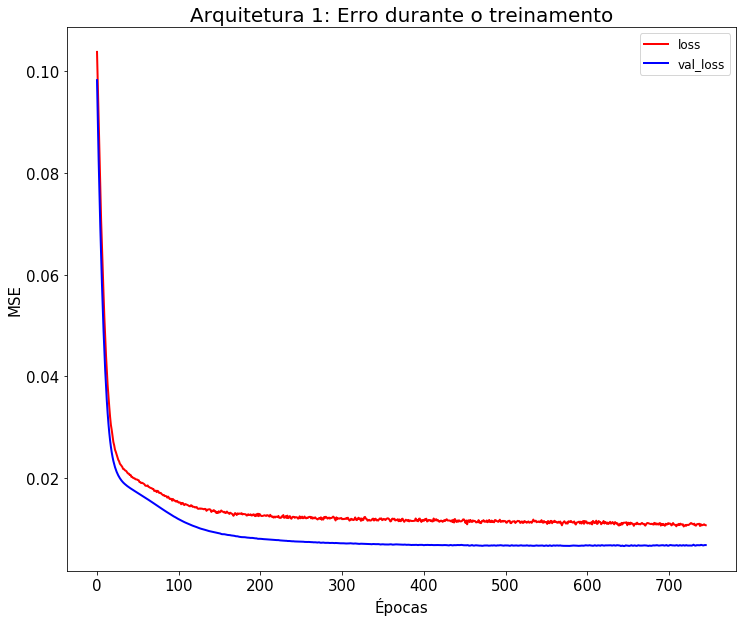

In [25]:
# Plota gráfico de comparação entre erro e erro de validação
plt.figure(figsize=(12,10))
plt.rc('axes', titlesize=20)
plt.rc('font', size=15)
plt.plot(history_ae1.history['loss'],color='r',label="loss",linewidth=2)
plt.plot(history_ae1.history['val_loss'],color='b',label="val_loss",linewidth=2)
plt.xlabel(u"Épocas")
plt.ylabel("MSE")
plt.title("Arquitetura 1: Erro durante o treinamento")
plt.rc('font', size=12)
plt.legend()
plt.show()

In [26]:
np.min(history_ae1.history['loss'])

0.010391764147724542

In [27]:
np.min(history_ae1.history['val_loss'])

0.0065280728481246705

## Arquitetura 2: Redução e com Dropout

In [28]:
# Arquitetura que o professor falou
encoding_dim1 = input_dim//2
entrada = Input(shape=(input_dim,))
x = Dropout(0.3)(entrada)
x = Dense(encoding_dim1,activation="relu")(x)
decoded = Dense(input_dim,activation="sigmoid")(x)

In [29]:
# Cria o modelo para a rede anteriormente montada
ae2 = Model(entrada,decoded)

In [30]:
# Compila o modelo com o método otimizador e a funlção de erro utilizadas
ae2.compile(optimizer='adam', loss='mse')

In [31]:
# Treina a rede
# EarlyStopping para o treinamento se ver que não tá mais melhorando
# History é para plotar gráficos de erro
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100, restore_best_weights=True)
history_ae2 = ae2.fit(X_trainAtMes, X_trainAtMes,
                epochs=10000,
                batch_size=batch,
                shuffle=True,
                validation_split=0.3,
                callbacks=[es])

Train on 1800 samples, validate on 772 samples
Epoch 1/10000
1800/1800 [==============================] - 0s 234us/step - loss: 0.0674 - val_loss: 0.0632
Epoch 2/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0654 - val_loss: 0.0611
Epoch 3/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0631 - val_loss: 0.0591
Epoch 4/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0613 - val_loss: 0.0572
Epoch 5/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0594 - val_loss: 0.0555
Epoch 6/10000
1800/1800 [==============================] - 0s 23us/step - loss: 0.0575 - val_loss: 0.0538
Epoch 7/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0556 - val_loss: 0.0521
Epoch 8/10000
1800/1800 [==============================] - 0s 24us/step - loss: 0.0540 - val_loss: 0.0504
Epoch 9/10000
1800/1800 [==============================] - 0s 22us/step - loss: 0.0523 - val_loss: 0.048

1800/1800 [==============================] - 0s 15us/step - loss: 0.0184 - val_loss: 0.0161
Epoch 78/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0183 - val_loss: 0.0160
Epoch 79/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0184 - val_loss: 0.0160
Epoch 80/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0183 - val_loss: 0.0159
Epoch 81/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0181 - val_loss: 0.0158
Epoch 82/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0180 - val_loss: 0.0157
Epoch 83/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0179 - val_loss: 0.0156
Epoch 84/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0179 - val_loss: 0.0155
Epoch 85/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0180 - val_loss: 0.0154
Epoch 86/10000
1800/1800 [==========================

Epoch 153/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0138 - val_loss: 0.0098
Epoch 154/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0137 - val_loss: 0.0098
Epoch 155/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0137 - val_loss: 0.0097
Epoch 156/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0136 - val_loss: 0.0097
Epoch 157/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0138 - val_loss: 0.0096
Epoch 158/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0137 - val_loss: 0.0096
Epoch 159/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0138 - val_loss: 0.0096
Epoch 160/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0136 - val_loss: 0.0096
Epoch 161/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0135 - val_loss: 0.0095
Epoch 162/10000
1800/1800 [=

Epoch 229/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0125 - val_loss: 0.0083
Epoch 230/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0127 - val_loss: 0.0083
Epoch 231/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0126 - val_loss: 0.0082
Epoch 232/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0126 - val_loss: 0.0082
Epoch 233/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0128 - val_loss: 0.0082
Epoch 234/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0126 - val_loss: 0.0082
Epoch 235/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0127 - val_loss: 0.0082
Epoch 236/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0128 - val_loss: 0.0081
Epoch 237/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0124 - val_loss: 0.0082
Epoch 238/10000
1800/1800 [=

Epoch 305/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0121 - val_loss: 0.0077
Epoch 306/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0123 - val_loss: 0.0077
Epoch 307/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0122 - val_loss: 0.0076
Epoch 308/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0121 - val_loss: 0.0076
Epoch 309/10000
1800/1800 [==============================] - 0s 22us/step - loss: 0.0120 - val_loss: 0.0076
Epoch 310/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0121 - val_loss: 0.0076
Epoch 311/10000
1800/1800 [==============================] - 0s 9us/step - loss: 0.0119 - val_loss: 0.0076
Epoch 312/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0122 - val_loss: 0.0076
Epoch 313/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0121 - val_loss: 0.0077
Epoch 314/10000
1800/1800 [==

Epoch 381/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0119 - val_loss: 0.0073
Epoch 382/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0121 - val_loss: 0.0073
Epoch 383/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0121 - val_loss: 0.0073
Epoch 384/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0120 - val_loss: 0.0073
Epoch 385/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0120 - val_loss: 0.0073
Epoch 386/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0121 - val_loss: 0.0073
Epoch 387/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0120 - val_loss: 0.0073
Epoch 388/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0120 - val_loss: 0.0073
Epoch 389/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0118 - val_loss: 0.0073
Epoch 390/10000
1800/1800 [=

Epoch 457/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0115 - val_loss: 0.0071
Epoch 458/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0117 - val_loss: 0.0072
Epoch 459/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0119 - val_loss: 0.0071
Epoch 460/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0120 - val_loss: 0.0071
Epoch 461/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0118 - val_loss: 0.0071
Epoch 462/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0118 - val_loss: 0.0071
Epoch 463/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0116 - val_loss: 0.0071
Epoch 464/10000
1800/1800 [==============================] - 0s 23us/step - loss: 0.0119 - val_loss: 0.0071
Epoch 465/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0117 - val_loss: 0.0071
Epoch 466/10000
1800/1800 [=

Epoch 533/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0116 - val_loss: 0.0070
Epoch 534/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0114 - val_loss: 0.0070
Epoch 535/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0116 - val_loss: 0.0070
Epoch 536/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0119 - val_loss: 0.0070
Epoch 537/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0114 - val_loss: 0.0070
Epoch 538/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0120 - val_loss: 0.0069
Epoch 539/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0117 - val_loss: 0.0070
Epoch 540/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0116 - val_loss: 0.0070
Epoch 541/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0117 - val_loss: 0.0070
Epoch 542/10000
1800/1800 [=

Epoch 609/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0115 - val_loss: 0.0069
Epoch 610/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0111 - val_loss: 0.0069
Epoch 611/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0112 - val_loss: 0.0070
Epoch 612/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0114 - val_loss: 0.0070
Epoch 613/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0113 - val_loss: 0.0069
Epoch 614/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0114 - val_loss: 0.0069
Epoch 615/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0112 - val_loss: 0.0070
Epoch 616/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0116 - val_loss: 0.0069
Epoch 617/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0114 - val_loss: 0.0068
Epoch 618/10000
1800/1800 [=

Epoch 685/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0109 - val_loss: 0.0071
Epoch 686/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0107 - val_loss: 0.0071
Epoch 687/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0106 - val_loss: 0.0072
Epoch 688/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0111 - val_loss: 0.0070
Epoch 689/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0107 - val_loss: 0.0070
Epoch 690/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0108 - val_loss: 0.0071
Epoch 691/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0108 - val_loss: 0.0070
Epoch 692/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0106 - val_loss: 0.0070
Epoch 693/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0105 - val_loss: 0.0071
Epoch 694/10000
1800/1800 [=

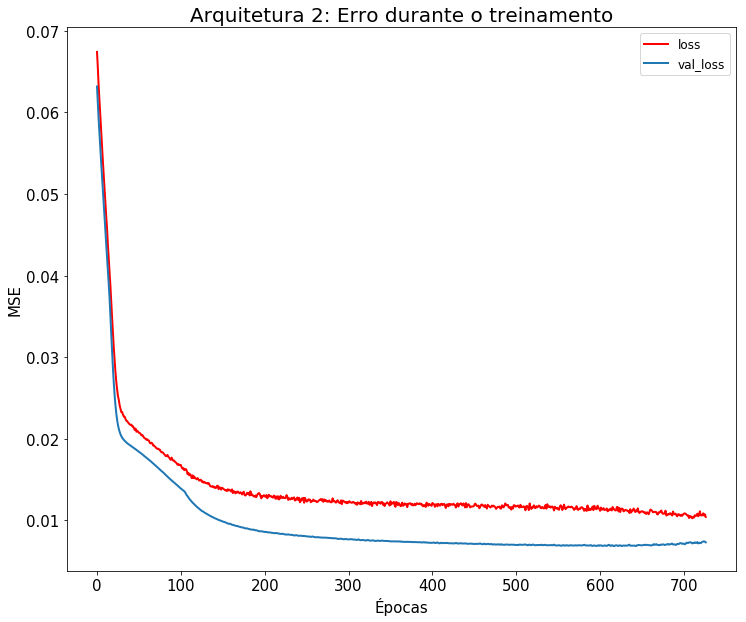

In [32]:
# Plota gráfico de comparação entre erro e erro de validação
plt.figure(figsize=(12,10))
plt.rc('axes', titlesize=20)
plt.rc('font', size=15)
plt.plot(history_ae2.history['loss'],color='r',label="loss",linewidth=2)
plt.plot(history_ae2.history['val_loss'],label="val_loss",linewidth=2)
plt.xlabel(u"Épocas")
plt.ylabel("MSE")
plt.title("Arquitetura 2: Erro durante o treinamento")
plt.rc('font', size=12)
plt.legend()
plt.show()

In [33]:
np.min(history_ae2.history['loss'])

0.010252375736729139

In [34]:
np.min(history_ae2.history['val_loss'])

0.006846787383263555

## Arquitetura 3: Com BatchNormalization e Relu

In [35]:
# Rede com duas camadas decodificadas e Relu e batch
encoding_dim1 = input_dim//2
entrada = Input(shape=(input_dim,))
batch1 = BatchNormalization()(entrada)
encoded1 = Dense(encoding_dim1,activation="relu")(batch1)
dp2 = Dropout(0.1)(encoded1) 
encoded2 = Dense(encoding_dim1,activation="relu")(dp2)
batch2 = BatchNormalization()(encoded2)
decoded = Dense(input_dim,activation="sigmoid")(batch2)

In [36]:
# Cria o modelo para a rede anteriormente montada
ae3 = Model(entrada,decoded)

In [37]:
# Compila o modelo com o método otimizador e a funlção de erro utilizadas
ae3.compile(optimizer='adam', loss='mse')

In [38]:
# Treina a rede
# EarlyStopping para o treinamento se ver que não tá mais melhorando
# History é para plotar gráficos de erro
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100, restore_best_weights=True)
history_ae3 = ae3.fit(X_trainAtMes, X_trainAtMes,
                epochs=10000,
                batch_size=batch,
                shuffle=True,
                validation_split=0.3,
                callbacks=[es])

Train on 1800 samples, validate on 772 samples
Epoch 1/10000
1800/1800 [==============================] - 2s 851us/step - loss: 0.1061 - val_loss: 0.0996
Epoch 2/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.1026 - val_loss: 0.0964
Epoch 3/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0997 - val_loss: 0.0934
Epoch 4/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0963 - val_loss: 0.0907
Epoch 5/10000
1800/1800 [==============================] - 0s 23us/step - loss: 0.0941 - val_loss: 0.0882
Epoch 6/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0913 - val_loss: 0.0858
Epoch 7/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0888 - val_loss: 0.0836
Epoch 8/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0866 - val_loss: 0.0815
Epoch 9/10000
1800/1800 [==============================] - 0s 22us/step - loss: 0.0843 - val_loss: 0.079

1800/1800 [==============================] - 0s 18us/step - loss: 0.0123 - val_loss: 0.0113
Epoch 78/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0124 - val_loss: 0.0111
Epoch 79/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0120 - val_loss: 0.0109
Epoch 80/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0119 - val_loss: 0.0107
Epoch 81/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0118 - val_loss: 0.0105
Epoch 82/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0116 - val_loss: 0.0103
Epoch 83/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0114 - val_loss: 0.0102
Epoch 84/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0114 - val_loss: 0.0100
Epoch 85/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0112 - val_loss: 0.0099
Epoch 86/10000
1800/1800 [==========================

1800/1800 [==============================] - 0s 15us/step - loss: 0.0059 - val_loss: 0.0043
Epoch 154/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0062 - val_loss: 0.0043
Epoch 155/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0059 - val_loss: 0.0042
Epoch 156/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0059 - val_loss: 0.0042
Epoch 157/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0060 - val_loss: 0.0042
Epoch 158/10000
1800/1800 [==============================] - 0s 21us/step - loss: 0.0059 - val_loss: 0.0041
Epoch 159/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0059 - val_loss: 0.0041
Epoch 160/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0058 - val_loss: 0.0041
Epoch 161/10000
1800/1800 [==============================] - 0s 23us/step - loss: 0.0059 - val_loss: 0.0040
Epoch 162/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 17us/step - loss: 0.0049 - val_loss: 0.0030
Epoch 230/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0050 - val_loss: 0.0030
Epoch 231/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0048 - val_loss: 0.0030
Epoch 232/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0050 - val_loss: 0.0030
Epoch 233/10000
1800/1800 [==============================] - 0s 21us/step - loss: 0.0051 - val_loss: 0.0030
Epoch 234/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0049 - val_loss: 0.0030
Epoch 235/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0049 - val_loss: 0.0030
Epoch 236/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0048 - val_loss: 0.0030
Epoch 237/10000
1800/1800 [==============================] - 0s 25us/step - loss: 0.0048 - val_loss: 0.0030
Epoch 238/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 16us/step - loss: 0.0048 - val_loss: 0.0027
Epoch 306/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0046 - val_loss: 0.0027
Epoch 307/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0047 - val_loss: 0.0027
Epoch 308/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0047 - val_loss: 0.0027
Epoch 309/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0045 - val_loss: 0.0027
Epoch 310/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0046 - val_loss: 0.0027
Epoch 311/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0047 - val_loss: 0.0027
Epoch 312/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0044 - val_loss: 0.0027
Epoch 313/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0044 - val_loss: 0.0027
Epoch 314/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 22us/step - loss: 0.0046 - val_loss: 0.0025
Epoch 382/10000
1800/1800 [==============================] - 0s 21us/step - loss: 0.0044 - val_loss: 0.0025
Epoch 383/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0044 - val_loss: 0.0025
Epoch 384/10000
1800/1800 [==============================] - 0s 28us/step - loss: 0.0043 - val_loss: 0.0025
Epoch 385/10000
1800/1800 [==============================] - 0s 23us/step - loss: 0.0044 - val_loss: 0.0025
Epoch 386/10000
1800/1800 [==============================] - 0s 26us/step - loss: 0.0044 - val_loss: 0.0025
Epoch 387/10000
1800/1800 [==============================] - 0s 25us/step - loss: 0.0044 - val_loss: 0.0025
Epoch 388/10000
1800/1800 [==============================] - 0s 21us/step - loss: 0.0044 - val_loss: 0.0025
Epoch 389/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0044 - val_loss: 0.0025
Epoch 390/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 15us/step - loss: 0.0044 - val_loss: 0.0023
Epoch 458/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0043 - val_loss: 0.0023
Epoch 459/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0044 - val_loss: 0.0023
Epoch 460/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0042 - val_loss: 0.0023
Epoch 461/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0041 - val_loss: 0.0023
Epoch 462/10000
1800/1800 [==============================] - 0s 27us/step - loss: 0.0043 - val_loss: 0.0023
Epoch 463/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0044 - val_loss: 0.0023
Epoch 464/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0044 - val_loss: 0.0023
Epoch 465/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0044 - val_loss: 0.0023
Epoch 466/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 15us/step - loss: 0.0042 - val_loss: 0.0022
Epoch 534/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0043 - val_loss: 0.0022
Epoch 535/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0039 - val_loss: 0.0022
Epoch 536/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0042 - val_loss: 0.0022
Epoch 537/10000
1800/1800 [==============================] - 0s 21us/step - loss: 0.0040 - val_loss: 0.0022
Epoch 538/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0042 - val_loss: 0.0022
Epoch 539/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0042 - val_loss: 0.0022
Epoch 540/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0041 - val_loss: 0.0022
Epoch 541/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0041 - val_loss: 0.0022
Epoch 542/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 17us/step - loss: 0.0040 - val_loss: 0.0021
Epoch 610/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0041 - val_loss: 0.0021
Epoch 611/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0040 - val_loss: 0.0021
Epoch 612/10000
1800/1800 [==============================] - 0s 21us/step - loss: 0.0041 - val_loss: 0.0021
Epoch 613/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0038 - val_loss: 0.0021
Epoch 614/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0042 - val_loss: 0.0021
Epoch 615/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0041 - val_loss: 0.0021
Epoch 616/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0041 - val_loss: 0.0021
Epoch 617/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0041 - val_loss: 0.0021
Epoch 618/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 19us/step - loss: 0.0039 - val_loss: 0.0020
Epoch 686/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0039 - val_loss: 0.0020
Epoch 687/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0041 - val_loss: 0.0020
Epoch 688/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0040 - val_loss: 0.0020
Epoch 689/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0038 - val_loss: 0.0020
Epoch 690/10000
1800/1800 [==============================] - 0s 21us/step - loss: 0.0042 - val_loss: 0.0020
Epoch 691/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0041 - val_loss: 0.0020
Epoch 692/10000
1800/1800 [==============================] - 0s 21us/step - loss: 0.0038 - val_loss: 0.0020
Epoch 693/10000
1800/1800 [==============================] - 0s 21us/step - loss: 0.0039 - val_loss: 0.0020
Epoch 694/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 19us/step - loss: 0.0039 - val_loss: 0.0020
Epoch 762/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0039 - val_loss: 0.0020
Epoch 763/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0041 - val_loss: 0.0020
Epoch 764/10000
1800/1800 [==============================] - 0s 23us/step - loss: 0.0040 - val_loss: 0.0020
Epoch 765/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0038 - val_loss: 0.0020
Epoch 766/10000
1800/1800 [==============================] - 0s 22us/step - loss: 0.0041 - val_loss: 0.0020
Epoch 767/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0040 - val_loss: 0.0020
Epoch 768/10000
1800/1800 [==============================] - 0s 25us/step - loss: 0.0041 - val_loss: 0.0020
Epoch 769/10000
1800/1800 [==============================] - 0s 27us/step - loss: 0.0041 - val_loss: 0.0020
Epoch 770/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 18us/step - loss: 0.0040 - val_loss: 0.0019
Epoch 838/10000
1800/1800 [==============================] - 0s 21us/step - loss: 0.0039 - val_loss: 0.0019
Epoch 839/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0040 - val_loss: 0.0019
Epoch 840/10000
1800/1800 [==============================] - 0s 21us/step - loss: 0.0039 - val_loss: 0.0019
Epoch 841/10000
1800/1800 [==============================] - 0s 25us/step - loss: 0.0039 - val_loss: 0.0019
Epoch 842/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0040 - val_loss: 0.0019
Epoch 843/10000
1800/1800 [==============================] - 0s 22us/step - loss: 0.0037 - val_loss: 0.0019
Epoch 844/10000
1800/1800 [==============================] - 0s 25us/step - loss: 0.0038 - val_loss: 0.0019
Epoch 845/10000
1800/1800 [==============================] - 0s 24us/step - loss: 0.0041 - val_loss: 0.0019
Epoch 846/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 13us/step - loss: 0.0038 - val_loss: 0.0018
Epoch 914/10000
1800/1800 [==============================] - 0s 21us/step - loss: 0.0039 - val_loss: 0.0018
Epoch 915/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0042 - val_loss: 0.0019
Epoch 916/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0040 - val_loss: 0.0019
Epoch 917/10000
1800/1800 [==============================] - 0s 21us/step - loss: 0.0039 - val_loss: 0.0019
Epoch 918/10000
1800/1800 [==============================] - 0s 21us/step - loss: 0.0040 - val_loss: 0.0019
Epoch 919/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0039 - val_loss: 0.0019
Epoch 920/10000
1800/1800 [==============================] - 0s 21us/step - loss: 0.0040 - val_loss: 0.0019
Epoch 921/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0039 - val_loss: 0.0019
Epoch 922/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 18us/step - loss: 0.0040 - val_loss: 0.0018
Epoch 990/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0038 - val_loss: 0.0018
Epoch 991/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0038 - val_loss: 0.0018
Epoch 992/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0040 - val_loss: 0.0018
Epoch 993/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0039 - val_loss: 0.0018
Epoch 994/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0039 - val_loss: 0.0018
Epoch 995/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0040 - val_loss: 0.0018
Epoch 996/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0039 - val_loss: 0.0018
Epoch 997/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0039 - val_loss: 0.0018
Epoch 998/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 18us/step - loss: 0.0039 - val_loss: 0.0018
Epoch 1065/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0040 - val_loss: 0.0018
Epoch 1066/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0040 - val_loss: 0.0018
Epoch 1067/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0039 - val_loss: 0.0018
Epoch 1068/10000
1800/1800 [==============================] - 0s 21us/step - loss: 0.0039 - val_loss: 0.0018
Epoch 1069/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0040 - val_loss: 0.0018
Epoch 1070/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0040 - val_loss: 0.0018
Epoch 1071/10000
1800/1800 [==============================] - 0s 23us/step - loss: 0.0039 - val_loss: 0.0018
Epoch 1072/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0040 - val_loss: 0.0018
Epoch 1073/10000
1800/1800 [========

1800/1800 [==============================] - 0s 12us/step - loss: 0.0040 - val_loss: 0.0018
Epoch 1140/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0038 - val_loss: 0.0018
Epoch 1141/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0038 - val_loss: 0.0018
Epoch 1142/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0038 - val_loss: 0.0018
Epoch 1143/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0038 - val_loss: 0.0018
Epoch 1144/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0039 - val_loss: 0.0018
Epoch 1145/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0039 - val_loss: 0.0017
Epoch 1146/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0039 - val_loss: 0.0017
Epoch 1147/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0042 - val_loss: 0.0018
Epoch 1148/10000
1800/1800 [========

1800/1800 [==============================] - 0s 12us/step - loss: 0.0040 - val_loss: 0.0018
Epoch 1215/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0039 - val_loss: 0.0017
Epoch 1216/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0038 - val_loss: 0.0017
Epoch 1217/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0041 - val_loss: 0.0017
Epoch 1218/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0039 - val_loss: 0.0018
Epoch 1219/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0038 - val_loss: 0.0018
Epoch 1220/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0039 - val_loss: 0.0018
Epoch 1221/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0040 - val_loss: 0.0017
Epoch 1222/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0038 - val_loss: 0.0017
Epoch 1223/10000
1800/1800 [========

1800/1800 [==============================] - 0s 12us/step - loss: 0.0038 - val_loss: 0.0017
Epoch 1290/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0038 - val_loss: 0.0017
Epoch 1291/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0041 - val_loss: 0.0017
Epoch 1292/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0040 - val_loss: 0.0017
Epoch 1293/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0038 - val_loss: 0.0017
Epoch 1294/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0038 - val_loss: 0.0017
Epoch 1295/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0038 - val_loss: 0.0017
Epoch 1296/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0039 - val_loss: 0.0017
Epoch 1297/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0040 - val_loss: 0.0017
Epoch 1298/10000
1800/1800 [========

1800/1800 [==============================] - 0s 11us/step - loss: 0.0038 - val_loss: 0.0017
Epoch 1365/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0038 - val_loss: 0.0017
Epoch 1366/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0038 - val_loss: 0.0017
Epoch 1367/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0037 - val_loss: 0.0017
Epoch 1368/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0039 - val_loss: 0.0017
Epoch 1369/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0040 - val_loss: 0.0017
Epoch 1370/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0039 - val_loss: 0.0017
Epoch 1371/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0040 - val_loss: 0.0017
Epoch 1372/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0037 - val_loss: 0.0017
Epoch 1373/10000
1800/1800 [========

1800/1800 [==============================] - 0s 13us/step - loss: 0.0039 - val_loss: 0.0017
Epoch 1440/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0038 - val_loss: 0.0017
Epoch 1441/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0039 - val_loss: 0.0017
Epoch 1442/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0039 - val_loss: 0.0017
Epoch 1443/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0038 - val_loss: 0.0017
Epoch 1444/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0038 - val_loss: 0.0017
Epoch 1445/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0040 - val_loss: 0.0017
Epoch 1446/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0038 - val_loss: 0.0017
Epoch 1447/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0040 - val_loss: 0.0017
Epoch 1448/10000
1800/1800 [========

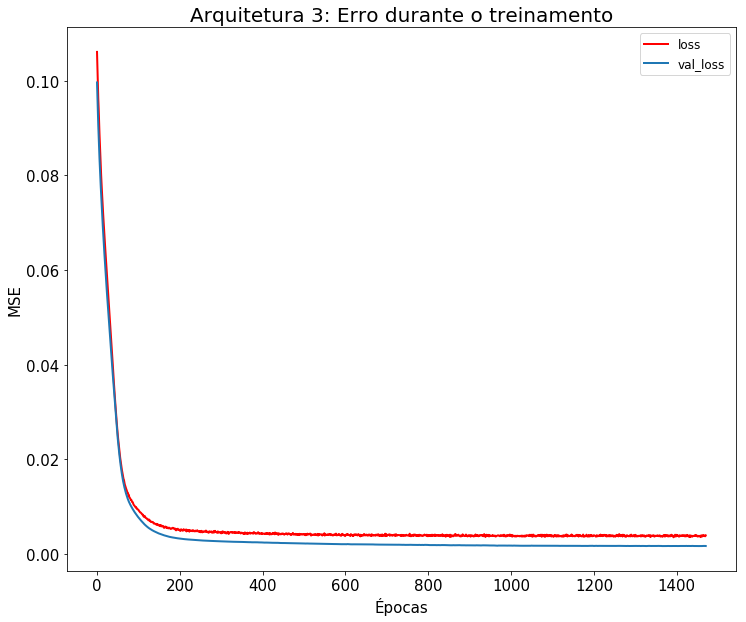

In [39]:
# Plota gráfico de comparação entre erro e erro de validação
plt.figure(figsize=(12,10))
plt.rc('axes', titlesize=20)
plt.rc('font', size=15)
plt.plot(history_ae3.history['loss'],color='r',label="loss",linewidth=2)
plt.plot(history_ae3.history['val_loss'],label="val_loss",linewidth=2)
plt.xlabel(u"Épocas")
plt.ylabel("MSE")
plt.title("Arquitetura 3: Erro durante o treinamento")
plt.rc('font', size=12)
plt.legend()
plt.show()

In [40]:
np.min(history_ae3.history['loss'])

0.0035658463071255634

In [41]:
np.min(history_ae3.history['val_loss'])

0.0017038895799826657

## Arquitetura 4 :Sem BatchNormalization e com Tanh

In [14]:
# Sem batch e com Tanh
encoding_dim1 = input_dim//2
entrada = Input(shape=(input_dim,))
encoded1 = Dense(encoding_dim1,activation="tanh")(entrada)
dp2 = Dropout(0.1)(encoded1) 
encoded2 = Dense(encoding_dim1,activation="tanh")(dp2)
decoded = Dense(input_dim,activation="sigmoid")(encoded2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [15]:
# Cria o modelo para a rede anteriormente montada
ae4 = Model(entrada,decoded)

In [16]:
# Compila o modelo com o método otimizador e a funlção de erro utilizadas
ae4.compile(optimizer='adam', loss='mse')

In [17]:
# Treina a rede
# EarlyStopping para o treinamento se ver que não tá mais melhorando
# History é para plotar gráficos de erro
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100, restore_best_weights=True)
history_ae4 = ae4.fit(X_trainAtMes, X_trainAtMes,
                epochs=10000,
                batch_size=batch,
                shuffle=True,
                validation_split=0.3,
                callbacks=[es])

Instructions for updating:
Use tf.cast instead.
Train on 1800 samples, validate on 772 samples
Epoch 1/10000
1800/1800 [==============================] - 2s 1ms/step - loss: 0.0761 - val_loss: 0.0737
Epoch 2/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0719 - val_loss: 0.0693
Epoch 3/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0677 - val_loss: 0.0651
Epoch 4/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0638 - val_loss: 0.0612
Epoch 5/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0602 - val_loss: 0.0575
Epoch 6/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0567 - val_loss: 0.0541
Epoch 7/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0535 - val_loss: 0.0509
Epoch 8/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0505 - val_loss: 0.0479
Epoch 9/10000
1800/1800 [==============================] -

Epoch 75/10000
1800/1800 [==============================] - 0s 8us/step - loss: 0.0190 - val_loss: 0.0181
Epoch 76/10000
1800/1800 [==============================] - 0s 9us/step - loss: 0.0189 - val_loss: 0.0180
Epoch 77/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0188 - val_loss: 0.0179
Epoch 78/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0187 - val_loss: 0.0178
Epoch 79/10000
1800/1800 [==============================] - 0s 9us/step - loss: 0.0186 - val_loss: 0.0177
Epoch 80/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0185 - val_loss: 0.0176
Epoch 81/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0184 - val_loss: 0.0175
Epoch 82/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0183 - val_loss: 0.0174
Epoch 83/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0183 - val_loss: 0.0173
Epoch 84/10000
1800/1800 [==============

1800/1800 [==============================] - 0s 12us/step - loss: 0.0107 - val_loss: 0.0095
Epoch 152/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0107 - val_loss: 0.0094
Epoch 153/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0105 - val_loss: 0.0093
Epoch 154/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0106 - val_loss: 0.0092
Epoch 155/10000
1800/1800 [==============================] - 0s 9us/step - loss: 0.0104 - val_loss: 0.0091
Epoch 156/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0102 - val_loss: 0.0090
Epoch 157/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0102 - val_loss: 0.0089
Epoch 158/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0100 - val_loss: 0.0088
Epoch 159/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0100 - val_loss: 0.0087
Epoch 160/10000
1800/1800 [==================

1800/1800 [==============================] - 0s 10us/step - loss: 0.0072 - val_loss: 0.0057
Epoch 228/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0070 - val_loss: 0.0057
Epoch 229/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0069 - val_loss: 0.0057
Epoch 230/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0070 - val_loss: 0.0057
Epoch 231/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0071 - val_loss: 0.0056
Epoch 232/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0071 - val_loss: 0.0056
Epoch 233/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0070 - val_loss: 0.0056
Epoch 234/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0069 - val_loss: 0.0056
Epoch 235/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0068 - val_loss: 0.0056
Epoch 236/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 12us/step - loss: 0.0062 - val_loss: 0.0049
Epoch 304/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0061 - val_loss: 0.0049
Epoch 305/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0062 - val_loss: 0.0049
Epoch 306/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0062 - val_loss: 0.0049
Epoch 307/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0061 - val_loss: 0.0049
Epoch 308/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0061 - val_loss: 0.0049
Epoch 309/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0061 - val_loss: 0.0049
Epoch 310/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0060 - val_loss: 0.0048
Epoch 311/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0061 - val_loss: 0.0048
Epoch 312/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 13us/step - loss: 0.0056 - val_loss: 0.0043
Epoch 380/10000
1800/1800 [==============================] - 0s 9us/step - loss: 0.0055 - val_loss: 0.0043
Epoch 381/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0055 - val_loss: 0.0043
Epoch 382/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0054 - val_loss: 0.0043
Epoch 383/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0054 - val_loss: 0.0043
Epoch 384/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0055 - val_loss: 0.0043
Epoch 385/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0055 - val_loss: 0.0043
Epoch 386/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0055 - val_loss: 0.0043
Epoch 387/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0054 - val_loss: 0.0042
Epoch 388/10000
1800/1800 [==================

1800/1800 [==============================] - 0s 12us/step - loss: 0.0046 - val_loss: 0.0035
Epoch 456/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0047 - val_loss: 0.0035
Epoch 457/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0048 - val_loss: 0.0035
Epoch 458/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0047 - val_loss: 0.0035
Epoch 459/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0047 - val_loss: 0.0035
Epoch 460/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0046 - val_loss: 0.0035
Epoch 461/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0047 - val_loss: 0.0035
Epoch 462/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0047 - val_loss: 0.0035
Epoch 463/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0046 - val_loss: 0.0035
Epoch 464/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 16us/step - loss: 0.0042 - val_loss: 0.0029
Epoch 532/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0040 - val_loss: 0.0029
Epoch 533/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0040 - val_loss: 0.0029
Epoch 534/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0042 - val_loss: 0.0029
Epoch 535/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0040 - val_loss: 0.0029
Epoch 536/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0041 - val_loss: 0.0029
Epoch 537/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0040 - val_loss: 0.0029
Epoch 538/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0041 - val_loss: 0.0028
Epoch 539/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0041 - val_loss: 0.0028
Epoch 540/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 10us/step - loss: 0.0037 - val_loss: 0.0026
Epoch 608/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0038 - val_loss: 0.0026
Epoch 609/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0037 - val_loss: 0.0026
Epoch 610/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0038 - val_loss: 0.0026
Epoch 611/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0036 - val_loss: 0.0026
Epoch 612/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0038 - val_loss: 0.0026
Epoch 613/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0037 - val_loss: 0.0026
Epoch 614/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0037 - val_loss: 0.0026
Epoch 615/10000
1800/1800 [==============================] - 0s 9us/step - loss: 0.0036 - val_loss: 0.0025
Epoch 616/10000
1800/1800 [==================

1800/1800 [==============================] - 0s 19us/step - loss: 0.0035 - val_loss: 0.0024
Epoch 684/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0035 - val_loss: 0.0024
Epoch 685/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0035 - val_loss: 0.0024
Epoch 686/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0035 - val_loss: 0.0024
Epoch 687/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0035 - val_loss: 0.0024
Epoch 688/10000
1800/1800 [==============================] - 0s 9us/step - loss: 0.0035 - val_loss: 0.0024
Epoch 689/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0035 - val_loss: 0.0024
Epoch 690/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0035 - val_loss: 0.0024
Epoch 691/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0036 - val_loss: 0.0024
Epoch 692/10000
1800/1800 [==================

1800/1800 [==============================] - 0s 13us/step - loss: 0.0033 - val_loss: 0.0022
Epoch 760/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0034 - val_loss: 0.0022
Epoch 761/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0033 - val_loss: 0.0022
Epoch 762/10000
1800/1800 [==============================] - 0s 9us/step - loss: 0.0034 - val_loss: 0.0022
Epoch 763/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0033 - val_loss: 0.0022
Epoch 764/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0033 - val_loss: 0.0022
Epoch 765/10000
1800/1800 [==============================] - 0s 21us/step - loss: 0.0034 - val_loss: 0.0022
Epoch 766/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0033 - val_loss: 0.0022
Epoch 767/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0034 - val_loss: 0.0022
Epoch 768/10000
1800/1800 [==================

1800/1800 [==============================] - 0s 13us/step - loss: 0.0032 - val_loss: 0.0021
Epoch 836/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0032 - val_loss: 0.0020
Epoch 837/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0032 - val_loss: 0.0020
Epoch 838/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0032 - val_loss: 0.0020
Epoch 839/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0031 - val_loss: 0.0020
Epoch 840/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0032 - val_loss: 0.0020
Epoch 841/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0032 - val_loss: 0.0020
Epoch 842/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0032 - val_loss: 0.0020
Epoch 843/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0031 - val_loss: 0.0020
Epoch 844/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 11us/step - loss: 0.0029 - val_loss: 0.0018
Epoch 912/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0029 - val_loss: 0.0018
Epoch 913/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0030 - val_loss: 0.0018
Epoch 914/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0029 - val_loss: 0.0018
Epoch 915/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0029 - val_loss: 0.0018
Epoch 916/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0029 - val_loss: 0.0018
Epoch 917/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0029 - val_loss: 0.0017
Epoch 918/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0029 - val_loss: 0.0017
Epoch 919/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0029 - val_loss: 0.0017
Epoch 920/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 16us/step - loss: 0.0027 - val_loss: 0.0016
Epoch 988/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0028 - val_loss: 0.0016
Epoch 989/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0027 - val_loss: 0.0016
Epoch 990/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0028 - val_loss: 0.0016
Epoch 991/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0027 - val_loss: 0.0016
Epoch 992/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0028 - val_loss: 0.0016
Epoch 993/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0027 - val_loss: 0.0016
Epoch 994/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0028 - val_loss: 0.0016
Epoch 995/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0028 - val_loss: 0.0016
Epoch 996/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 10us/step - loss: 0.0026 - val_loss: 0.0015
Epoch 1063/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0027 - val_loss: 0.0015
Epoch 1064/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0027 - val_loss: 0.0015
Epoch 1065/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0026 - val_loss: 0.0015
Epoch 1066/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0026 - val_loss: 0.0015
Epoch 1067/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0027 - val_loss: 0.0015
Epoch 1068/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0027 - val_loss: 0.0015
Epoch 1069/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0027 - val_loss: 0.0015
Epoch 1070/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0026 - val_loss: 0.0015
Epoch 1071/10000
1800/1800 [========

1800/1800 [==============================] - 0s 16us/step - loss: 0.0026 - val_loss: 0.0014
Epoch 1138/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0026 - val_loss: 0.0014
Epoch 1139/10000
1800/1800 [==============================] - 0s 9us/step - loss: 0.0026 - val_loss: 0.0014
Epoch 1140/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0025 - val_loss: 0.0014
Epoch 1141/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0026 - val_loss: 0.0014
Epoch 1142/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0026 - val_loss: 0.0014
Epoch 1143/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0025 - val_loss: 0.0014
Epoch 1144/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0026 - val_loss: 0.0014
Epoch 1145/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0026 - val_loss: 0.0014
Epoch 1146/10000
1800/1800 [=========

1800/1800 [==============================] - 0s 13us/step - loss: 0.0026 - val_loss: 0.0014
Epoch 1213/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0026 - val_loss: 0.0014
Epoch 1214/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0025 - val_loss: 0.0014
Epoch 1215/10000
1800/1800 [==============================] - 0s 18us/step - loss: 0.0026 - val_loss: 0.0014
Epoch 1216/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0026 - val_loss: 0.0014
Epoch 1217/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0026 - val_loss: 0.0014
Epoch 1218/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0026 - val_loss: 0.0014
Epoch 1219/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0025 - val_loss: 0.0014
Epoch 1220/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0025 - val_loss: 0.0014
Epoch 1221/10000
1800/1800 [========

1800/1800 [==============================] - 0s 16us/step - loss: 0.0025 - val_loss: 0.0013
Epoch 1288/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0025 - val_loss: 0.0013
Epoch 1289/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0025 - val_loss: 0.0013
Epoch 1290/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0025 - val_loss: 0.0013
Epoch 1291/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0025 - val_loss: 0.0013
Epoch 1292/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0025 - val_loss: 0.0013
Epoch 1293/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0025 - val_loss: 0.0013
Epoch 1294/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0025 - val_loss: 0.0013
Epoch 1295/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0025 - val_loss: 0.0013
Epoch 1296/10000
1800/1800 [========

1800/1800 [==============================] - 0s 15us/step - loss: 0.0024 - val_loss: 0.0013
Epoch 1363/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0025 - val_loss: 0.0013
Epoch 1364/10000
1800/1800 [==============================] - 0s 9us/step - loss: 0.0025 - val_loss: 0.0013
Epoch 1365/10000
1800/1800 [==============================] - 0s 9us/step - loss: 0.0025 - val_loss: 0.0013
Epoch 1366/10000
1800/1800 [==============================] - 0s 9us/step - loss: 0.0025 - val_loss: 0.0013
Epoch 1367/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0025 - val_loss: 0.0013
Epoch 1368/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0025 - val_loss: 0.0013
Epoch 1369/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0026 - val_loss: 0.0013
Epoch 1370/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0025 - val_loss: 0.0013
Epoch 1371/10000
1800/1800 [===========

1800/1800 [==============================] - 0s 12us/step - loss: 0.0025 - val_loss: 0.0013
Epoch 1438/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0025 - val_loss: 0.0013
Epoch 1439/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0024 - val_loss: 0.0013
Epoch 1440/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0024 - val_loss: 0.0013
Epoch 1441/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0026 - val_loss: 0.0013
Epoch 1442/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0025 - val_loss: 0.0013
Epoch 1443/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0024 - val_loss: 0.0013
Epoch 1444/10000
1800/1800 [==============================] - 0s 9us/step - loss: 0.0024 - val_loss: 0.0013
Epoch 1445/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0025 - val_loss: 0.0013
Epoch 1446/10000
1800/1800 [=========

1800/1800 [==============================] - 0s 14us/step - loss: 0.0025 - val_loss: 0.0013
Epoch 1513/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0024 - val_loss: 0.0013
Epoch 1514/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0024 - val_loss: 0.0013
Epoch 1515/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0024 - val_loss: 0.0013
Epoch 1516/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0024 - val_loss: 0.0013
Epoch 1517/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0025 - val_loss: 0.0013
Epoch 1518/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0024 - val_loss: 0.0012
Epoch 1519/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0025 - val_loss: 0.0013
Epoch 1520/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0025 - val_loss: 0.0013
Epoch 1521/10000
1800/1800 [========

1800/1800 [==============================] - 0s 10us/step - loss: 0.0024 - val_loss: 0.0012
Epoch 1588/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0024 - val_loss: 0.0012
Epoch 1589/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0024 - val_loss: 0.0012
Epoch 1590/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0025 - val_loss: 0.0012
Epoch 1591/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0024 - val_loss: 0.0012
Epoch 1592/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0026 - val_loss: 0.0012
Epoch 1593/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0024 - val_loss: 0.0012
Epoch 1594/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0024 - val_loss: 0.0012
Epoch 1595/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0023 - val_loss: 0.0012
Epoch 1596/10000
1800/1800 [========

1800/1800 [==============================] - 0s 9us/step - loss: 0.0024 - val_loss: 0.0012
Epoch 1663/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0024 - val_loss: 0.0012
Epoch 1664/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0024 - val_loss: 0.0012
Epoch 1665/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0024 - val_loss: 0.0012
Epoch 1666/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0024 - val_loss: 0.0012
Epoch 1667/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0024 - val_loss: 0.0012
Epoch 1668/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0024 - val_loss: 0.0012
Epoch 1669/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0024 - val_loss: 0.0012
Epoch 1670/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0023 - val_loss: 0.0012
Epoch 1671/10000
1800/1800 [=========

1800/1800 [==============================] - 0s 10us/step - loss: 0.0023 - val_loss: 0.0012
Epoch 1738/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0023 - val_loss: 0.0012
Epoch 1739/10000
1800/1800 [==============================] - 0s 9us/step - loss: 0.0023 - val_loss: 0.0012
Epoch 1740/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0024 - val_loss: 0.0012
Epoch 1741/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0023 - val_loss: 0.0012
Epoch 1742/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0024 - val_loss: 0.0012
Epoch 1743/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0023 - val_loss: 0.0012
Epoch 1744/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0024 - val_loss: 0.0012
Epoch 1745/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0023 - val_loss: 0.0012
Epoch 1746/10000
1800/1800 [=========

1800/1800 [==============================] - 0s 9us/step - loss: 0.0023 - val_loss: 0.0011
Epoch 1813/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0024 - val_loss: 0.0011
Epoch 1814/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0023 - val_loss: 0.0011
Epoch 1815/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0023 - val_loss: 0.0011
Epoch 1816/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0024 - val_loss: 0.0011
Epoch 1817/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0024 - val_loss: 0.0011
Epoch 1818/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0023 - val_loss: 0.0011
Epoch 1819/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0022 - val_loss: 0.0011
Epoch 1820/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0024 - val_loss: 0.0011
Epoch 1821/10000
1800/1800 [=========

1800/1800 [==============================] - 0s 11us/step - loss: 0.0023 - val_loss: 0.0011
Epoch 1888/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0023 - val_loss: 0.0011
Epoch 1889/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0023 - val_loss: 0.0011
Epoch 1890/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0022 - val_loss: 0.0011
Epoch 1891/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0023 - val_loss: 0.0011
Epoch 1892/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0023 - val_loss: 0.0011
Epoch 1893/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0023 - val_loss: 0.0011
Epoch 1894/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0022 - val_loss: 0.0011
Epoch 1895/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0023 - val_loss: 0.0011
Epoch 1896/10000
1800/1800 [========

1800/1800 [==============================] - 0s 11us/step - loss: 0.0022 - val_loss: 0.0011
Epoch 1963/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0023 - val_loss: 0.0011
Epoch 1964/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0023 - val_loss: 0.0011
Epoch 1965/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0023 - val_loss: 0.0011
Epoch 1966/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0023 - val_loss: 0.0011
Epoch 1967/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0023 - val_loss: 0.0011
Epoch 1968/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0023 - val_loss: 0.0011
Epoch 1969/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0024 - val_loss: 0.0011
Epoch 1970/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0023 - val_loss: 0.0010
Epoch 1971/10000
1800/1800 [========

1800/1800 [==============================] - 0s 11us/step - loss: 0.0023 - val_loss: 0.0010
Epoch 2038/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0023 - val_loss: 0.0010
Epoch 2039/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0022 - val_loss: 0.0010
Epoch 2040/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0023 - val_loss: 0.0010
Epoch 2041/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0023 - val_loss: 0.0010
Epoch 2042/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0022 - val_loss: 0.0010
Epoch 2043/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0023 - val_loss: 0.0010
Epoch 2044/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0023 - val_loss: 0.0010
Epoch 2045/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0022 - val_loss: 0.0010
Epoch 2046/10000
1800/1800 [========

Epoch 2112/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0021 - val_loss: 9.9368e-04
Epoch 2113/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0022 - val_loss: 9.9228e-04
Epoch 2114/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0023 - val_loss: 9.9761e-04
Epoch 2115/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0022 - val_loss: 9.9624e-04
Epoch 2116/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0022 - val_loss: 9.9299e-04
Epoch 2117/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0022 - val_loss: 9.8831e-04
Epoch 2118/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0022 - val_loss: 9.9184e-04
Epoch 2119/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0022 - val_loss: 9.9644e-04
Epoch 2120/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0021 - val_

1800/1800 [==============================] - 0s 13us/step - loss: 0.0022 - val_loss: 9.7905e-04
Epoch 2185/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0023 - val_loss: 9.7183e-04
Epoch 2186/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0023 - val_loss: 9.6630e-04
Epoch 2187/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0023 - val_loss: 9.7323e-04
Epoch 2188/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0022 - val_loss: 9.7405e-04
Epoch 2189/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0023 - val_loss: 9.6509e-04
Epoch 2190/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0023 - val_loss: 9.7577e-04
Epoch 2191/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0022 - val_loss: 9.7480e-04
Epoch 2192/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0022 - val_loss: 9.6721e-04


1800/1800 [==============================] - 0s 14us/step - loss: 0.0023 - val_loss: 9.6171e-04
Epoch 2257/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0023 - val_loss: 9.5498e-04
Epoch 2258/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0022 - val_loss: 9.5875e-04
Epoch 2259/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0022 - val_loss: 9.6084e-04
Epoch 2260/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0022 - val_loss: 9.5489e-04
Epoch 2261/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0023 - val_loss: 9.5333e-04
Epoch 2262/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0023 - val_loss: 9.6383e-04
Epoch 2263/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0021 - val_loss: 9.5887e-04
Epoch 2264/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0022 - val_loss: 9.6037e-04


1800/1800 [==============================] - 0s 13us/step - loss: 0.0021 - val_loss: 9.5312e-04
Epoch 2329/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0022 - val_loss: 9.4531e-04
Epoch 2330/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0021 - val_loss: 9.4935e-04
Epoch 2331/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0022 - val_loss: 9.5375e-04
Epoch 2332/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0022 - val_loss: 9.5043e-04
Epoch 2333/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0023 - val_loss: 9.4685e-04
Epoch 2334/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0021 - val_loss: 9.4796e-04
Epoch 2335/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0021 - val_loss: 9.4968e-04
Epoch 2336/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0022 - val_loss: 9.4990e-04


1800/1800 [==============================] - 0s 12us/step - loss: 0.0022 - val_loss: 9.4383e-04
Epoch 2401/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0022 - val_loss: 9.4330e-04
Epoch 2402/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0020 - val_loss: 9.5228e-04
Epoch 2403/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0022 - val_loss: 9.4293e-04
Epoch 2404/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0023 - val_loss: 9.3827e-04
Epoch 2405/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0021 - val_loss: 9.4568e-04
Epoch 2406/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0022 - val_loss: 9.4706e-04
Epoch 2407/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0022 - val_loss: 9.4752e-04
Epoch 2408/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0022 - val_loss: 9.4913e-04


1800/1800 [==============================] - 0s 16us/step - loss: 0.0023 - val_loss: 9.3425e-04
Epoch 2473/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0023 - val_loss: 9.3773e-04
Epoch 2474/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0022 - val_loss: 9.3459e-04
Epoch 2475/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0022 - val_loss: 9.3520e-04
Epoch 2476/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0021 - val_loss: 9.3505e-04
Epoch 2477/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0023 - val_loss: 9.2948e-04
Epoch 2478/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0021 - val_loss: 9.3183e-04
Epoch 2479/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0022 - val_loss: 9.2946e-04
Epoch 2480/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0022 - val_loss: 9.3392e-04


1800/1800 [==============================] - 0s 15us/step - loss: 0.0022 - val_loss: 9.2650e-04
Epoch 2545/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0021 - val_loss: 9.2091e-04
Epoch 2546/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0022 - val_loss: 9.3048e-04
Epoch 2547/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0021 - val_loss: 9.3097e-04
Epoch 2548/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0022 - val_loss: 9.3270e-04
Epoch 2549/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0022 - val_loss: 9.2621e-04
Epoch 2550/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0022 - val_loss: 9.2840e-04
Epoch 2551/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0022 - val_loss: 9.2807e-04
Epoch 2552/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0021 - val_loss: 9.2777e-04


1800/1800 [==============================] - 0s 13us/step - loss: 0.0021 - val_loss: 9.2977e-04
Epoch 2617/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0022 - val_loss: 9.2380e-04
Epoch 2618/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0023 - val_loss: 9.2055e-04
Epoch 2619/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0022 - val_loss: 9.2412e-04
Epoch 2620/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0021 - val_loss: 9.2313e-04
Epoch 2621/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0021 - val_loss: 9.1880e-04
Epoch 2622/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0021 - val_loss: 9.2551e-04
Epoch 2623/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0022 - val_loss: 9.2591e-04
Epoch 2624/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0021 - val_loss: 9.2179e-04


1800/1800 [==============================] - 0s 13us/step - loss: 0.0022 - val_loss: 9.2097e-04
Epoch 2689/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0022 - val_loss: 9.2108e-04
Epoch 2690/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0021 - val_loss: 9.2541e-04
Epoch 2691/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0022 - val_loss: 9.1918e-04
Epoch 2692/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0021 - val_loss: 9.1623e-04
Epoch 2693/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0021 - val_loss: 9.2050e-04
Epoch 2694/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0021 - val_loss: 9.2689e-04
Epoch 2695/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0022 - val_loss: 9.2484e-04
Epoch 2696/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0021 - val_loss: 9.1880e-04


1800/1800 [==============================] - 0s 15us/step - loss: 0.0023 - val_loss: 9.1770e-04
Epoch 2761/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0022 - val_loss: 9.1880e-04
Epoch 2762/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0021 - val_loss: 9.1849e-04
Epoch 2763/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0021 - val_loss: 9.1776e-04
Epoch 2764/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0022 - val_loss: 9.1546e-04
Epoch 2765/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0021 - val_loss: 9.1960e-04
Epoch 2766/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0021 - val_loss: 9.1486e-04
Epoch 2767/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0022 - val_loss: 9.1977e-04
Epoch 2768/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0022 - val_loss: 9.2645e-04


1800/1800 [==============================] - 0s 13us/step - loss: 0.0021 - val_loss: 9.1481e-04
Epoch 2833/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0022 - val_loss: 9.1273e-04
Epoch 2834/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0021 - val_loss: 9.1623e-04
Epoch 2835/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0022 - val_loss: 9.1426e-04
Epoch 2836/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0022 - val_loss: 9.1802e-04
Epoch 2837/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0020 - val_loss: 9.1693e-04
Epoch 2838/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0021 - val_loss: 9.1453e-04
Epoch 2839/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0022 - val_loss: 9.0943e-04
Epoch 2840/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0022 - val_loss: 9.1312e-04


1800/1800 [==============================] - 0s 14us/step - loss: 0.0022 - val_loss: 9.1021e-04
Epoch 2905/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0021 - val_loss: 9.1372e-04
Epoch 2906/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0022 - val_loss: 9.1573e-04
Epoch 2907/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0021 - val_loss: 9.0899e-04
Epoch 2908/10000
1800/1800 [==============================] - 0s 10us/step - loss: 0.0021 - val_loss: 9.1339e-04
Epoch 2909/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0020 - val_loss: 9.0844e-04
Epoch 2910/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0022 - val_loss: 9.1468e-04
Epoch 2911/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0022 - val_loss: 9.0839e-04
Epoch 2912/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0021 - val_loss: 9.0034e-04


1800/1800 [==============================] - 0s 12us/step - loss: 0.0022 - val_loss: 9.0741e-04
Epoch 2977/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0021 - val_loss: 9.0228e-04
Epoch 2978/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0022 - val_loss: 9.0591e-04
Epoch 2979/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0022 - val_loss: 9.1353e-04
Epoch 2980/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0021 - val_loss: 9.1160e-04
Epoch 2981/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0022 - val_loss: 9.0758e-04
Epoch 2982/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0021 - val_loss: 9.1497e-04
Epoch 2983/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0022 - val_loss: 9.1873e-04
Epoch 2984/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0022 - val_loss: 9.1998e-04


1800/1800 [==============================] - 0s 15us/step - loss: 0.0022 - val_loss: 9.0319e-04
Epoch 3049/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0021 - val_loss: 9.0226e-04
Epoch 3050/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0022 - val_loss: 9.0561e-04
Epoch 3051/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0021 - val_loss: 9.0477e-04
Epoch 3052/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0022 - val_loss: 9.0152e-04
Epoch 3053/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0021 - val_loss: 9.1378e-04
Epoch 3054/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0022 - val_loss: 9.0688e-04
Epoch 3055/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0022 - val_loss: 8.9616e-04
Epoch 3056/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0022 - val_loss: 9.0981e-04


1800/1800 [==============================] - 0s 14us/step - loss: 0.0022 - val_loss: 9.0209e-04
Epoch 3121/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0021 - val_loss: 9.0107e-04
Epoch 3122/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0022 - val_loss: 9.1085e-04
Epoch 3123/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0021 - val_loss: 8.9552e-04
Epoch 3124/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0021 - val_loss: 9.1127e-04
Epoch 3125/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0021 - val_loss: 9.0885e-04
Epoch 3126/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0020 - val_loss: 9.1137e-04
Epoch 3127/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0021 - val_loss: 9.0969e-04
Epoch 3128/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0021 - val_loss: 9.0013e-04


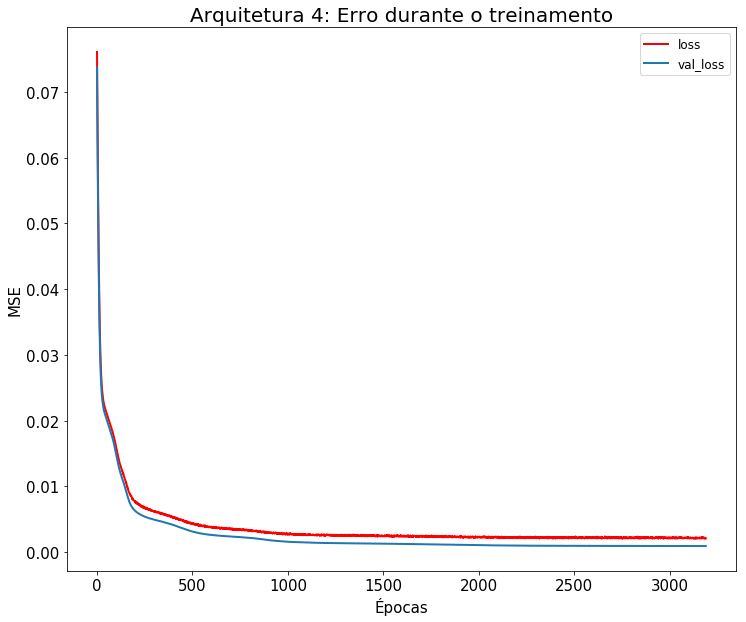

In [18]:
# Plota gráfico de comparação entre erro e erro de validação
plt.figure(figsize=(12,10))
plt.rc('axes', titlesize=20)
plt.rc('font', size=15)
plt.plot(history_ae4.history['loss'],color='r',label="loss",linewidth=2)
plt.plot(history_ae4.history['val_loss'],label="val_loss",linewidth=2)
plt.xlabel(u"Épocas")
plt.ylabel("MSE")
plt.title("Arquitetura 4: Erro durante o treinamento")
plt.rc('font', size=12)
plt.legend()
plt.show()

In [19]:
np.min(history_ae4.history['loss'])

0.0019953165295818406

In [20]:
np.min(history_ae4.history['val_loss'])

0.0008941221153007705

## Arquitetura 5: BatchNormalization e Tanh

In [49]:
# Rede com duas camadas decodificadas e batch_normalizzation e Tanh
encoding_dim1 = input_dim//2
entrada = Input(shape=(input_dim,))
batch1 = BatchNormalization()(entrada)
encoded1 = Dense(encoding_dim1,activation="tanh")(batch1)
dp2 = Dropout(0.1)(encoded1) 
encoded2 = Dense(encoding_dim1,activation="tanh")(dp2)
batch2 = BatchNormalization()(encoded2)
decoded = Dense(input_dim,activation="sigmoid")(batch2)

In [50]:
# Cria o modelo para a rede anteriormente montada
ae5 = Model(entrada,decoded)

In [51]:
# Compila o modelo com o método otimizador e a funlção de erro utilizadas
ae5.compile(optimizer='adam', loss='mse')

In [52]:
# Treina a rede
# EarlyStopping para o treinamento se ver que não tá mais melhorando
# History é para plotar gráficos de erro
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100, restore_best_weights=True)
history_ae5 = ae5.fit(X_trainAtMes, X_trainAtMes,
                epochs=10000,
                batch_size=batch,
                shuffle=True,
                validation_split=0.3,
                callbacks=[es])

Train on 1800 samples, validate on 772 samples
Epoch 1/10000
1800/1800 [==============================] - 1s 559us/step - loss: 0.1102 - val_loss: 0.1015
Epoch 2/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.1058 - val_loss: 0.0961
Epoch 3/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.1015 - val_loss: 0.0912
Epoch 4/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0972 - val_loss: 0.0870
Epoch 5/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0934 - val_loss: 0.0829
Epoch 6/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0900 - val_loss: 0.0794
Epoch 7/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0864 - val_loss: 0.0763
Epoch 8/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0836 - val_loss: 0.0735
Epoch 9/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0807 - val_loss: 0.071

1800/1800 [==============================] - 0s 13us/step - loss: 0.0094 - val_loss: 0.0083
Epoch 78/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0092 - val_loss: 0.0080
Epoch 79/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0089 - val_loss: 0.0078
Epoch 80/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0087 - val_loss: 0.0076
Epoch 81/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0086 - val_loss: 0.0074
Epoch 82/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0084 - val_loss: 0.0072
Epoch 83/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0082 - val_loss: 0.0070
Epoch 84/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0081 - val_loss: 0.0068
Epoch 85/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0079 - val_loss: 0.0067
Epoch 86/10000
1800/1800 [==========================

1800/1800 [==============================] - 0s 11us/step - loss: 0.0041 - val_loss: 0.0030
Epoch 154/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0041 - val_loss: 0.0030
Epoch 155/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0040 - val_loss: 0.0029
Epoch 156/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0040 - val_loss: 0.0029
Epoch 157/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0040 - val_loss: 0.0029
Epoch 158/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0041 - val_loss: 0.0029
Epoch 159/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0039 - val_loss: 0.0029
Epoch 160/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0040 - val_loss: 0.0028
Epoch 161/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0039 - val_loss: 0.0028
Epoch 162/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 13us/step - loss: 0.0032 - val_loss: 0.0021
Epoch 230/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0032 - val_loss: 0.0021
Epoch 231/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0032 - val_loss: 0.0020
Epoch 232/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0032 - val_loss: 0.0020
Epoch 233/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0033 - val_loss: 0.0020
Epoch 234/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0031 - val_loss: 0.0020
Epoch 235/10000
1800/1800 [==============================] - 0s 17us/step - loss: 0.0032 - val_loss: 0.0020
Epoch 236/10000
1800/1800 [==============================] - 0s 20us/step - loss: 0.0031 - val_loss: 0.0020
Epoch 237/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0032 - val_loss: 0.0020
Epoch 238/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 11us/step - loss: 0.0028 - val_loss: 0.0016
Epoch 306/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0029 - val_loss: 0.0016
Epoch 307/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0028 - val_loss: 0.0016
Epoch 308/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0029 - val_loss: 0.0016
Epoch 309/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0028 - val_loss: 0.0016
Epoch 310/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0028 - val_loss: 0.0016
Epoch 311/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0028 - val_loss: 0.0016
Epoch 312/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0029 - val_loss: 0.0016
Epoch 313/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0028 - val_loss: 0.0016
Epoch 314/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 29us/step - loss: 0.0026 - val_loss: 0.0014
Epoch 382/10000
1800/1800 [==============================] - 0s 16us/step - loss: 0.0027 - val_loss: 0.0014
Epoch 383/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0027 - val_loss: 0.0014
Epoch 384/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0026 - val_loss: 0.0014
Epoch 385/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0027 - val_loss: 0.0014
Epoch 386/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0026 - val_loss: 0.0014
Epoch 387/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0026 - val_loss: 0.0014
Epoch 388/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0025 - val_loss: 0.0014
Epoch 389/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0026 - val_loss: 0.0014
Epoch 390/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 13us/step - loss: 0.0024 - val_loss: 0.0012
Epoch 458/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0025 - val_loss: 0.0012
Epoch 459/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0024 - val_loss: 0.0012
Epoch 460/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0025 - val_loss: 0.0012
Epoch 461/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0024 - val_loss: 0.0012
Epoch 462/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0025 - val_loss: 0.0012
Epoch 463/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0024 - val_loss: 0.0012
Epoch 464/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0024 - val_loss: 0.0012
Epoch 465/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0024 - val_loss: 0.0012
Epoch 466/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 11us/step - loss: 0.0024 - val_loss: 0.0011
Epoch 534/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0024 - val_loss: 0.0011
Epoch 535/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0024 - val_loss: 0.0011
Epoch 536/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0024 - val_loss: 0.0011
Epoch 537/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0024 - val_loss: 0.0011
Epoch 538/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0024 - val_loss: 0.0011
Epoch 539/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0022 - val_loss: 0.0011
Epoch 540/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0023 - val_loss: 0.0011
Epoch 541/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0023 - val_loss: 0.0011
Epoch 542/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 17us/step - loss: 0.0023 - val_loss: 0.0011
Epoch 610/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0023 - val_loss: 0.0011
Epoch 611/10000
1800/1800 [==============================] - 0s 19us/step - loss: 0.0023 - val_loss: 0.0011
Epoch 612/10000
1800/1800 [==============================] - 0s 15us/step - loss: 0.0025 - val_loss: 0.0010
Epoch 613/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0024 - val_loss: 0.0010
Epoch 614/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0024 - val_loss: 0.0010
Epoch 615/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0023 - val_loss: 0.0010
Epoch 616/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0023 - val_loss: 0.0010
Epoch 617/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0023 - val_loss: 0.0011
Epoch 618/10000
1800/1800 [=================

1800/1800 [==============================] - 0s 15us/step - loss: 0.0024 - val_loss: 0.0010
Epoch 686/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0022 - val_loss: 0.0010
Epoch 687/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0024 - val_loss: 0.0010
Epoch 688/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0022 - val_loss: 0.0010
Epoch 689/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0023 - val_loss: 0.0010
Epoch 690/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0023 - val_loss: 0.0010
Epoch 691/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0022 - val_loss: 0.0010
Epoch 692/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0023 - val_loss: 0.0010
Epoch 693/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0022 - val_loss: 0.0010
Epoch 694/10000
1800/1800 [=================

Epoch 761/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0024 - val_loss: 0.0010
Epoch 762/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0022 - val_loss: 0.0010
Epoch 763/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0024 - val_loss: 0.0010
Epoch 764/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0023 - val_loss: 0.0010
Epoch 765/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0024 - val_loss: 0.0010
Epoch 766/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0023 - val_loss: 0.0010
Epoch 767/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0023 - val_loss: 0.0010
Epoch 768/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0024 - val_loss: 0.0010
Epoch 769/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0023 - val_loss: 0.0010
Epoch 770/10000
1800/1800 [=

1800/1800 [==============================] - 0s 11us/step - loss: 0.0021 - val_loss: 0.0011
Epoch 837/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0024 - val_loss: 0.0011
Epoch 838/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0022 - val_loss: 0.0011
Epoch 839/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0024 - val_loss: 0.0011
Epoch 840/10000
1800/1800 [==============================] - 0s 14us/step - loss: 0.0023 - val_loss: 0.0011
Epoch 841/10000
1800/1800 [==============================] - 0s 13us/step - loss: 0.0023 - val_loss: 0.0011
Epoch 842/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0022 - val_loss: 0.0011
Epoch 843/10000
1800/1800 [==============================] - 0s 11us/step - loss: 0.0023 - val_loss: 0.0011
Epoch 844/10000
1800/1800 [==============================] - 0s 12us/step - loss: 0.0022 - val_loss: 0.0011
Epoch 845/10000
1800/1800 [=================

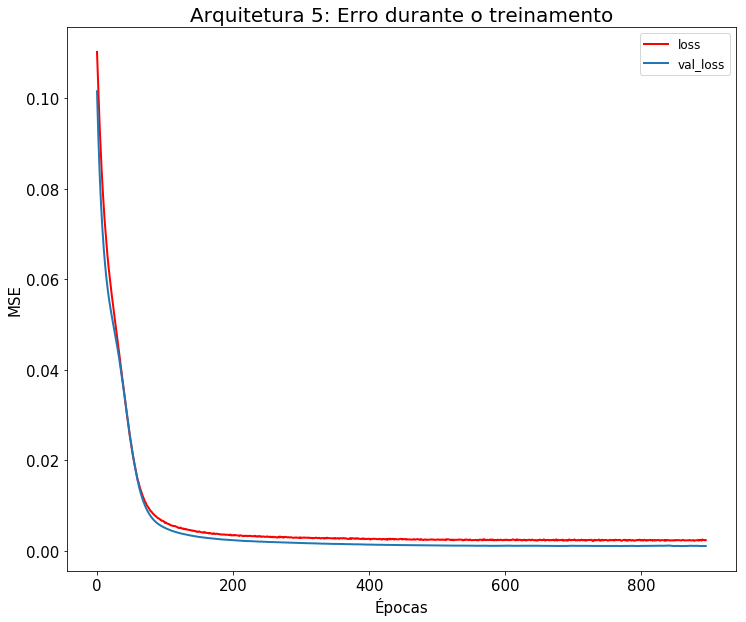

In [53]:
# Plota gráfico de comparação entre erro e erro de validação
plt.figure(figsize=(12,10))
plt.rc('axes', titlesize=20)
plt.rc('font', size=15)
plt.plot(history_ae5.history['loss'],color='r',label="loss",linewidth=2)
plt.plot(history_ae5.history['val_loss'],label="val_loss",linewidth=2)
plt.xlabel(u"Épocas")
plt.ylabel("MSE")
plt.title("Arquitetura 5: Erro durante o treinamento")
plt.rc('font', size=12)
plt.legend()
plt.show()

In [54]:
np.min(history_ae5.history['loss'])

0.002094039346815811

In [55]:
np.min(history_ae5.history['val_loss'])

0.0009860211785477368

# Teste de Modelo e Estimação de Probabilidade

In [21]:
final_autoencoder = ae4

In [22]:
def distancia(entrada):
    recons = final_autoencoder.predict(entrada)
    return norm(entrada-recons)

In [23]:
# Pn = e^-(||x-x^||)
def estimar_prob1(entrada):
    recons = final_autoencoder.predict(entrada)
    return pow(math.e, -norm(entrada-recons))

In [34]:
max(est_dis)

(94.00106546556819, 0.06186406904223802)

In [40]:
est_dis[0][:5]

(90.73514104484954, 0.09722546129215703)

In [41]:
# Cria um dicionário com a estimativa e a distância para o gráfico
est_dis = []
j = 0
for i in X_testAtMes.index:
    est_dis.append((estimar_prob1(np.array(X_testAtMes.loc[i]).reshape(1,21))*100,distancia(np.array(X_testAtMes.loc[i]).reshape(1,21))))
est_dis.sort(reverse=True)
est = []
dis = []
for tpl in est_dis:
    p, d = tpl
    est.append(p)
    dis.append(d)

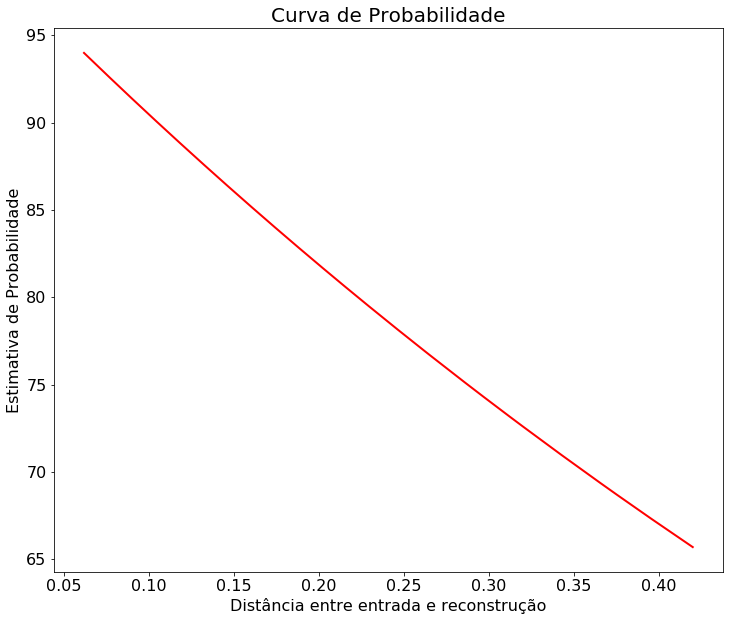

In [44]:
plt.figure(figsize=(12,10))
plt.rc('axes', titlesize=20)
plt.rc('font', size=16)
plt.plot(dis,est,color='r',linewidth=2)
plt.xlabel(u'Distância entre entrada e reconstrução')
plt.ylabel('Estimativa de Probabilidade')
plt.title('Curva de Probabilidade')
plt.show()

# Heatmap do Canadá

In [72]:
X_trainOrigin, X_testOrigin = train_test_split(origin, test_size=0.30, random_state=42)
lng = X_testOrigin['lng']*180/np.pi
lat = X_testOrigin['lat']*180/np.pi
lng = np.array(lng)
lat = np.array(lat)

In [49]:
lon_min=-141.5
lon_max=-54
lat_min=42
lat_max=72
#lat , lon = sampling(lon_min, lon_max, lat_min, lat_max)

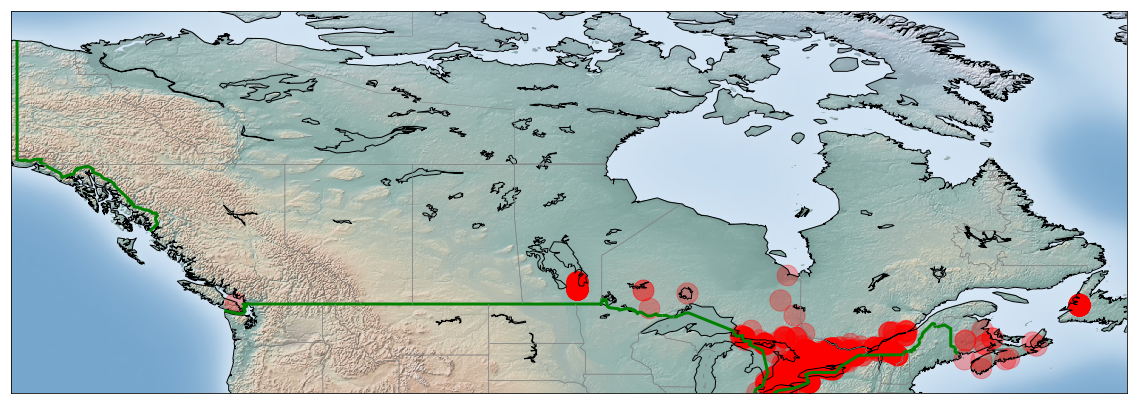

In [73]:
# Mapa com o tamanho do ponto sendo a probabilidade
fig = plt.figure(figsize=(20, 30))
bm = Basemap(projection='cyl', resolution='l',
            llcrnrlat=lat_min, urcrnrlat=lat_max,
            llcrnrlon=lon_min, urcrnrlon=lon_max)
bm.shadedrelief()
bm.drawcoastlines(color='black')
bm.drawcountries(color='green',linewidth=3)
bm.drawstates(color='gray')
for i in range(len(est)):
    bm.scatter(lng[i], lat[i], latlon=True, s=est[i]*5, c='red', alpha=0.3)
plt.show()

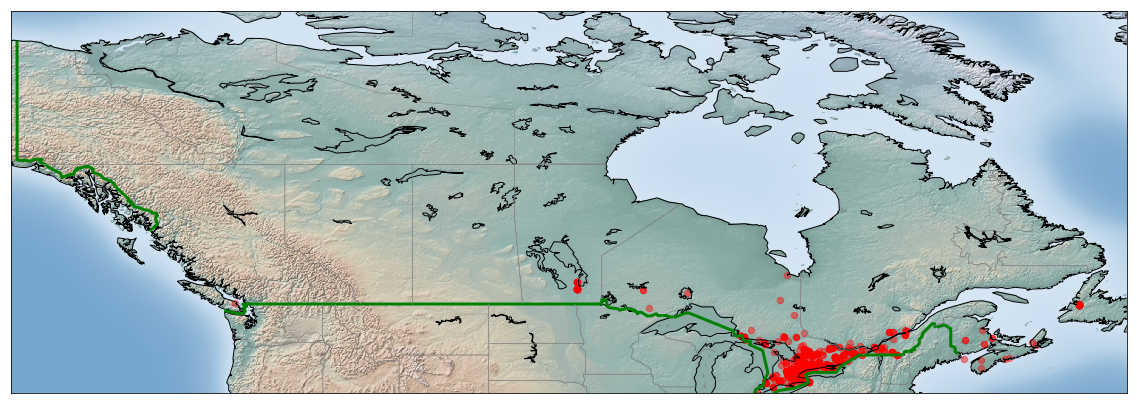

In [77]:
# Mapa com o alpha do ponto sendo a probabilidade
fig = plt.figure(figsize=(20, 30))
bm = Basemap(projection='cyl', resolution='l',
            llcrnrlat=lat_min, urcrnrlat=lat_max,
            llcrnrlon=lon_min, urcrnrlon=lon_max)
bm.shadedrelief()
bm.drawcoastlines(color='black')
bm.drawcountries(color='green',linewidth=3)
bm.drawstates(color='gray')
for i in range(len(est)):
    bm.scatter(lng[i], lat[i], latlon=True, s=40, c='red', alpha=est[i]/200)
plt.show()

In [47]:
X, Y = np.meshgrid(lng,lat)
Z = np.zeros((len(Y),len(X)),dtype=np.float64)
sz = len(Z)
for i in range(sz):
    for j in range(sz):
        if (i + j + 1 == sz):
            Z[i][j] = est[i]

may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftgrid
function to adjust the data to be consistent with the map projection
region (see examples/contour_demo.py).

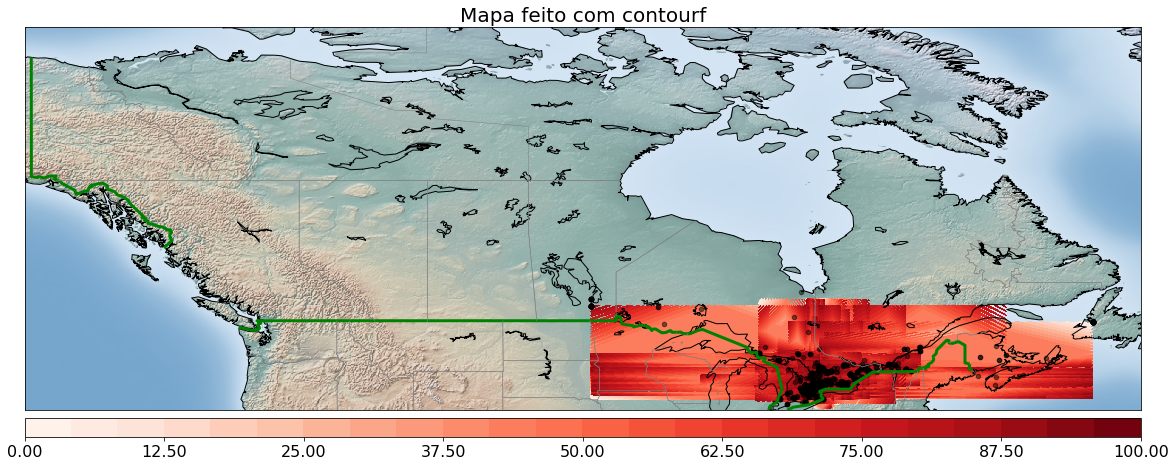

In [79]:
# Mapa feito com contourf
# https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.contourf
fig = plt.figure(figsize=(20, 30))
bm = Basemap(projection='cyl', resolution='l',
            llcrnrlat=lat_min, urcrnrlat=lat_max,
            llcrnrlon=lon_min, urcrnrlon=lon_max)
bm.shadedrelief()
bm.drawcoastlines(color='black')
bm.drawcountries(color='green',linewidth=3)
bm.drawstates(color='gray')

levels = np.linspace(0, 100, 25)
cf = bm.contourf(X, Y, Z,levels,cmap=plt.cm.Reds)
bm.colorbar(cf,location='bottom',format='%.2f')
bm.scatter(lng, lat, latlon=True, s=20, c='black', alpha=0.5)
plt.title("Mapa feito com contourf")
plt.show()